In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Input data

In [2]:
majortaxa = ['Thiotrichales', 'Methylococcales', 'Sulfurovum']
ranks = ['order','order', 'genus']
col = ['#ffc125','#7b68ee', '#ff7f24']

df_ALL = pd.read_csv('Data/NRKG_tpm', index_col=0, header=[0], sep='\t', dtype={'gi': str, 'taxid': str})
df_ALL = df_ALL.rename(columns={'KO':'ko'})

/home/motoki/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Relative mRNA abundances of the three major taxa

In [3]:
def cal_percent(df, sample):
    return df[sample].apply(lambda x: x / df[sample].sum())

In [4]:
samples=['insitu1', 'insitu2', 'onboard1', 'onboard2']

# sum of TPM
dfsum = pd.DataFrame(columns=samples, index=majortaxa)

for i in range(len(majortaxa)):
    dftaxa = df_ALL[df_ALL[ranks[i]] == majortaxa[i]]
    print(majortaxa[i], ":", len(dftaxa))
    
    dfsum.loc[majortaxa[i]] = dftaxa.loc[:, samples].sum()

dfsum

Thiotrichales : 49014
Methylococcales : 27321
Sulfurovum : 26141


,insitu1,insitu2,onboard1,onboard2
Thiotrichales,225015,203930,382399,333755
Methylococcales,231595,273227,146010,199250
Sulfurovum,206130,175233,64529.1,116874


In [5]:
# relative abundance
df_parcent = pd.DataFrame()

for i in range(len(samples)):
    df_parcent[samples[i]] = cal_percent(dfsum, samples[i])
    
df_parcent

,insitu1,insitu2,onboard1,onboard2
Thiotrichales,0.339522,0.312589,0.644922,0.513565
Methylococcales,0.349451,0.418809,0.246249,0.306596
Sulfurovum,0.311027,0.268602,0.108829,0.179839


In [6]:
df_parcent.index = ['Thiotrichales', 'Methylococcales', '$\it{Sulfurovum}$']
df_parcent.columns = ['$\it{In}$ $\it{situ}$ mRNA 1', '$\it{In}$ $\it{situ}$ mRNA 2', 'Onboard mRNA 1', 'Onboard mRNA 2']
df_fig_parcent = df_parcent[df_parcent.columns[::-1]]

<Figure size 576x144 with 0 Axes>

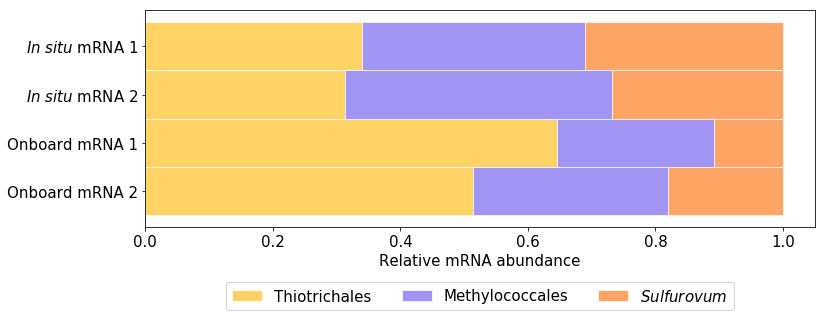

In [7]:
fig = plt.figure(figsize=(8, 2))

df_fig_parcent.T.plot.barh(figsize=(12, 4), alpha=0.7, stacked=True, color=col, width=1, edgecolor='w', fontsize=15)

plt.xlabel("Relative mRNA abundance", fontsize=15)
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='upper center', borderaxespad=0, ncol=4, fontsize=15)

plt.savefig('Figures/Fig3.pdf', bbox_inches='tight')

plt.show()